# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Training and Visualizing

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and petal width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

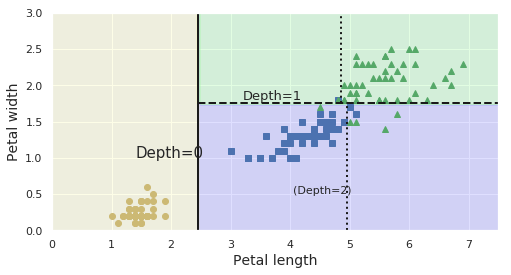

In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Predicting Classes and Class Probabilities

In [23]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [24]:
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivity to Training Set Details

In [25]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [26]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

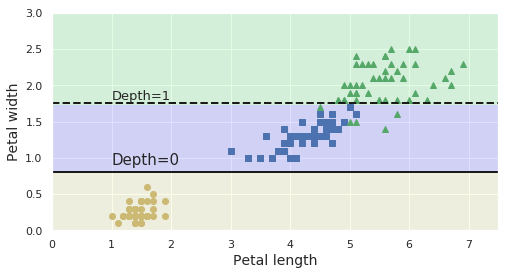

In [29]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

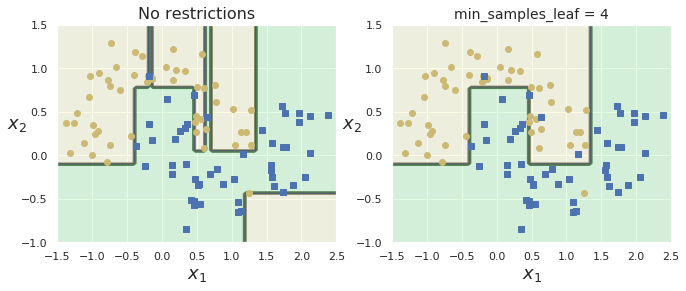

In [30]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

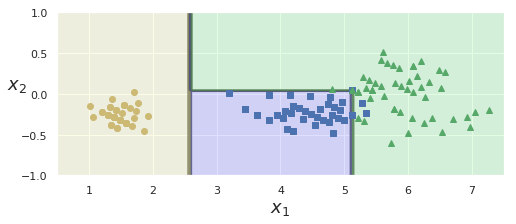

In [31]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

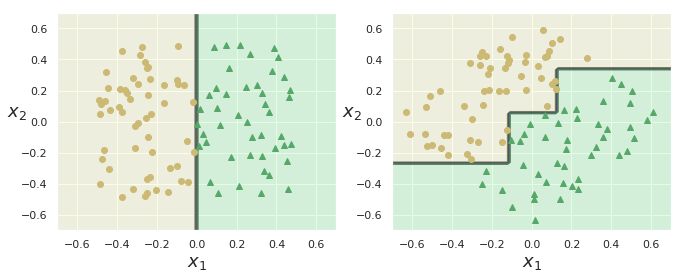

In [32]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

# Regression Trees

In [33]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

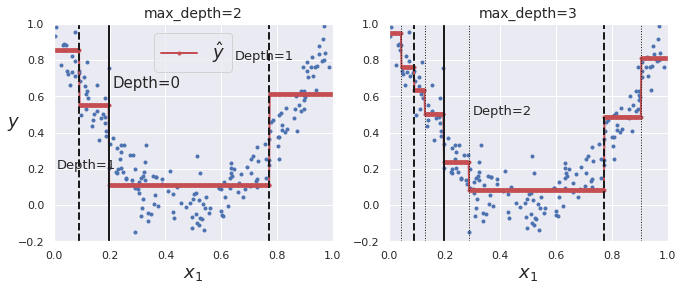

In [35]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

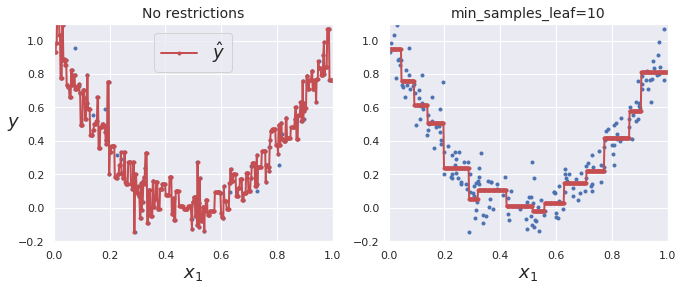

In [36]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

# Exercises

# 7 -

In [108]:
X, y = make_moons(n_samples=10000, noise=0.4)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
tree_moons = DecisionTreeClassifier()

parameters = {
    'max_depth': [2, 4, 8, 12],
    'min_samples_split': [2, 4, 8],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60]
}

In [112]:
moon_grid_search = GridSearchCV(tree_moons, param_grid=parameters, cv=3, verbose=3)
moon_grid_search.fit(X, y)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
[CV] max_depth=2, max_leaf_nodes=None, min_samples_split=2 ...........
[CV]  max_depth=2, max_leaf_nodes=None, min_samples_split=2, score=0.8503299340131973, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=None, min_samples_split=2 ...........
[CV]  max_depth=2, max_leaf_nodes=None, min_samples_split=2, score=0.852129574085183, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=None, min_samples_split=2 ...........
[CV]  max_depth=2, max_leaf_nodes=None, min_samples_split=2, score=0.8559423769507803, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=None, min_samples_split=4 ...........
[CV]  max_depth=2, max_leaf_nodes=None, min_samples_split=4, score=0.8503299340131973, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=None, min_samples_split=4 ...........
[CV]  max_depth=2, max_leaf_nodes=None, min_samples_split=4, score=0.852129574085183, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=None, min_samples_split=4 ...........
[CV]  max

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=2, max_leaf_nodes=20, min_samples_split=4, score=0.852129574085183, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=20, min_samples_split=4 .............
[CV]  max_depth=2, max_leaf_nodes=20, min_samples_split=4, score=0.8559423769507803, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=20, min_samples_split=8 .............
[CV]  max_depth=2, max_leaf_nodes=20, min_samples_split=8, score=0.8503299340131973, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=20, min_samples_split=8 .............
[CV]  max_depth=2, max_leaf_nodes=20, min_samples_split=8, score=0.852129574085183, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=20, min_samples_split=8 .............
[CV]  max_depth=2, max_leaf_nodes=20, min_samples_split=8, score=0.8559423769507803, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=30, min_samples_split=2 .............
[CV]  max_depth=2, max_leaf_nodes=30, min_samples_split=2, score=0.8503299340131973, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=30, min_samples_spli

[CV]  max_depth=4, max_leaf_nodes=20, min_samples_split=2, score=0.8500299940011997, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=20, min_samples_split=2 .............
[CV]  max_depth=4, max_leaf_nodes=20, min_samples_split=2, score=0.8458308338332333, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=20, min_samples_split=2 .............
[CV]  max_depth=4, max_leaf_nodes=20, min_samples_split=2, score=0.8565426170468188, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=20, min_samples_split=4 .............
[CV]  max_depth=4, max_leaf_nodes=20, min_samples_split=4, score=0.8500299940011997, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=20, min_samples_split=4 .............
[CV]  max_depth=4, max_leaf_nodes=20, min_samples_split=4, score=0.8458308338332333, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=20, min_samples_split=4 .............
[CV]  max_depth=4, max_leaf_nodes=20, min_samples_split=4, score=0.8565426170468188, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=20, min_samples_sp

[CV]  max_depth=8, max_leaf_nodes=None, min_samples_split=4, score=0.8449310137972406, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=None, min_samples_split=4 ...........
[CV]  max_depth=8, max_leaf_nodes=None, min_samples_split=4, score=0.8520408163265306, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=None, min_samples_split=8 ...........
[CV]  max_depth=8, max_leaf_nodes=None, min_samples_split=8, score=0.856628674265147, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=None, min_samples_split=8 ...........
[CV]  max_depth=8, max_leaf_nodes=None, min_samples_split=8, score=0.8449310137972406, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=None, min_samples_split=8 ...........
[CV]  max_depth=8, max_leaf_nodes=None, min_samples_split=8, score=0.8520408163265306, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=10, min_samples_split=2 .............
[CV]  max_depth=8, max_leaf_nodes=10, min_samples_split=2, score=0.8503299340131973, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=10, min_s

[CV]  max_depth=12, max_leaf_nodes=None, min_samples_split=2, score=0.8385354141656662, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=None, min_samples_split=4 ..........
[CV]  max_depth=12, max_leaf_nodes=None, min_samples_split=4, score=0.8380323935212958, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=None, min_samples_split=4 ..........
[CV]  max_depth=12, max_leaf_nodes=None, min_samples_split=4, score=0.8239352129574086, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=None, min_samples_split=4 ..........
[CV]  max_depth=12, max_leaf_nodes=None, min_samples_split=4, score=0.8367346938775511, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=None, min_samples_split=8 ..........
[CV]  max_depth=12, max_leaf_nodes=None, min_samples_split=8, score=0.8377324535092981, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=None, min_samples_split=8 ..........
[CV]  max_depth=12, max_leaf_nodes=None, min_samples_split=8, score=0.8245350929814037, total=   0.0s
[CV] max_depth=12, max_leaf_nodes

[CV]  max_depth=12, max_leaf_nodes=60, min_samples_split=4, score=0.8578284343131374, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=60, min_samples_split=4 ............
[CV]  max_depth=12, max_leaf_nodes=60, min_samples_split=4, score=0.852129574085183, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=60, min_samples_split=4 ............
[CV]  max_depth=12, max_leaf_nodes=60, min_samples_split=4, score=0.8514405762304922, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=60, min_samples_split=8 ............
[CV]  max_depth=12, max_leaf_nodes=60, min_samples_split=8, score=0.8575284943011398, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=60, min_samples_split=8 ............
[CV]  max_depth=12, max_leaf_nodes=60, min_samples_split=8, score=0.8518296340731853, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=60, min_samples_split=8 ............
[CV]  max_depth=12, max_leaf_nodes=60, min_samples_split=8, score=0.8514405762304922, total=   0.0s


[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:    3.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 4, 8, 12], 'min_samples_split': [2, 4, 8], 'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [113]:
moon_grid_search.best_score_

0.8568

In [114]:
moon_grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
y_pred = moon_grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

# 8 -

In [117]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, test_size=len(X_train) - 100)

In [118]:
mini_sets = []

for train_index, test_index in rs.split(X_train):
    X_mini_train = X_train[train_index]
    y_mini_train = y_train[train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [119]:
from sklearn.base import clone

forest = [clone(moon_grid_search.best_estimator_) for _ in range(1000)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.7872685

In [120]:
Y_pred = np.empty([1000, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [121]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [122]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.863